In [28]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb

from sklearn.preprocessing import StandardScaler

In [29]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='pytensor')

In [30]:
SEED = 12

## Parte 1: Modelos Lineales Generalizados (GLMs)


### 1.
Para el Dataset elegido, elegir variables para aplicar un modelo GLM Bayesiano
(pueden considerar una variable independiente y una variable respuesta, o trabajar
con m ́as de una para cada categor ́ıa) y presentar un brvee resumen de cada una y
la relaci ́on entre variables (si ya lo hicieron en la Parte 0, no es necesario repetirlo).


In [27]:
ls = pd.read_csv('../data/life_style.csv')
ls.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [31]:
ls.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [34]:
ls = ls[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type']].copy()

In [36]:
ls.columns = ['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration', 'Calories_Burned',
       'Workout_Type']

### 2.
Seleccionar un modelo GLM adecuado al tipo de variable respuesta:  
• Continua: regresion lineal o con varianza variable.   
• Binaria: regresion logıstica.  
• Modelo con estructura jerarquica  
• (Opcional) De conteo: regresion Poisson o negativa binomial.  


In [55]:
rl = bmb.Model('Calories_Burned ~ scale(Weight) + scale(Height) + scale(Session_Duration)', data=ls)

In [56]:
idata_rl = rl.fit(random_seed=SEED)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, scale(Weight), scale(Height), scale(Session_Duration)]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 87 seconds.


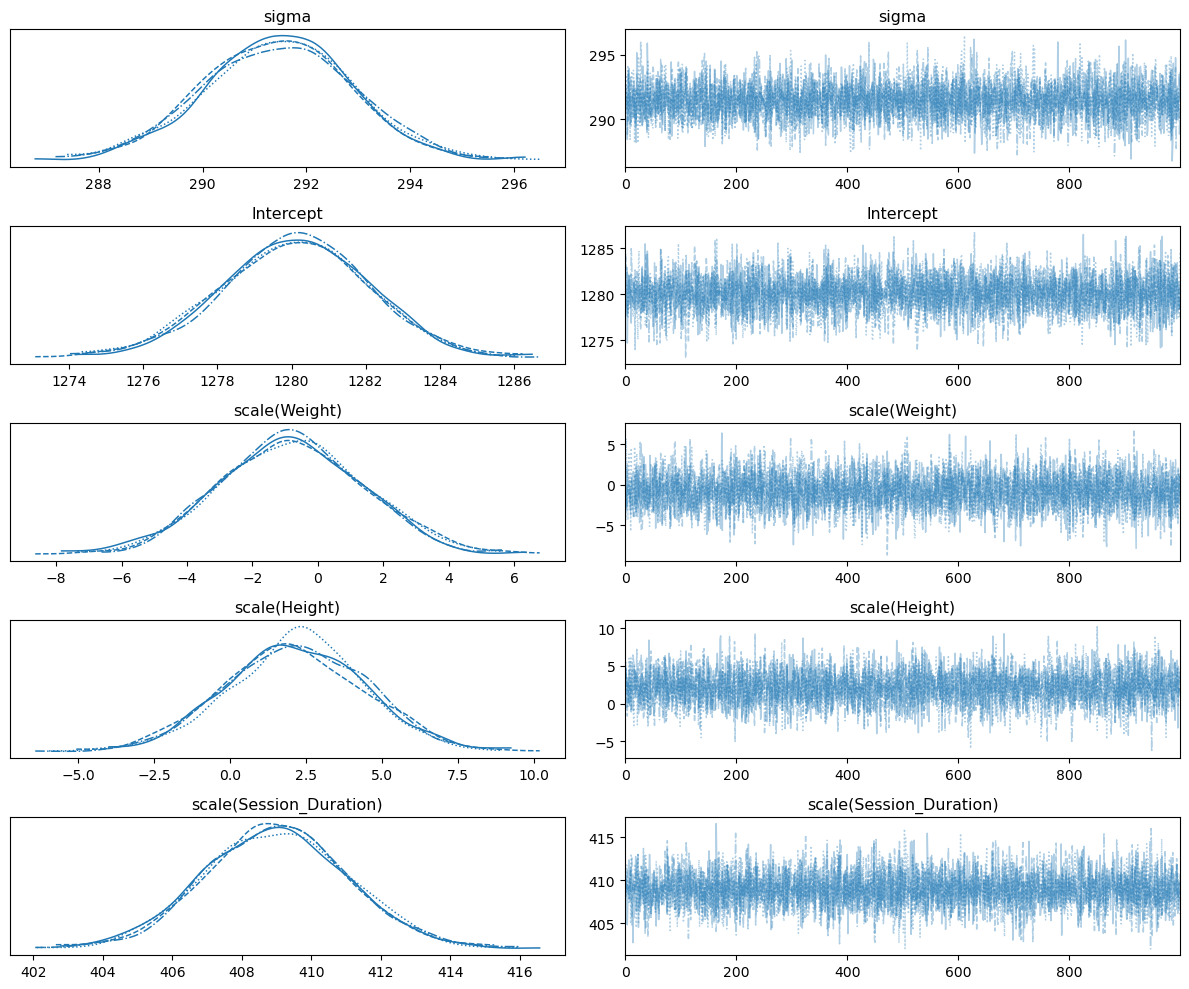

In [57]:
az.plot_trace(idata_rl)
plt.tight_layout();


### 3.
Formular las ecuaciones del modelo y justificar las distribuciones elegidas.


### 4.
Interpretar los parametros de la distribucion posterior: medias, intervalos de credibilidad, relacion con los predictores.


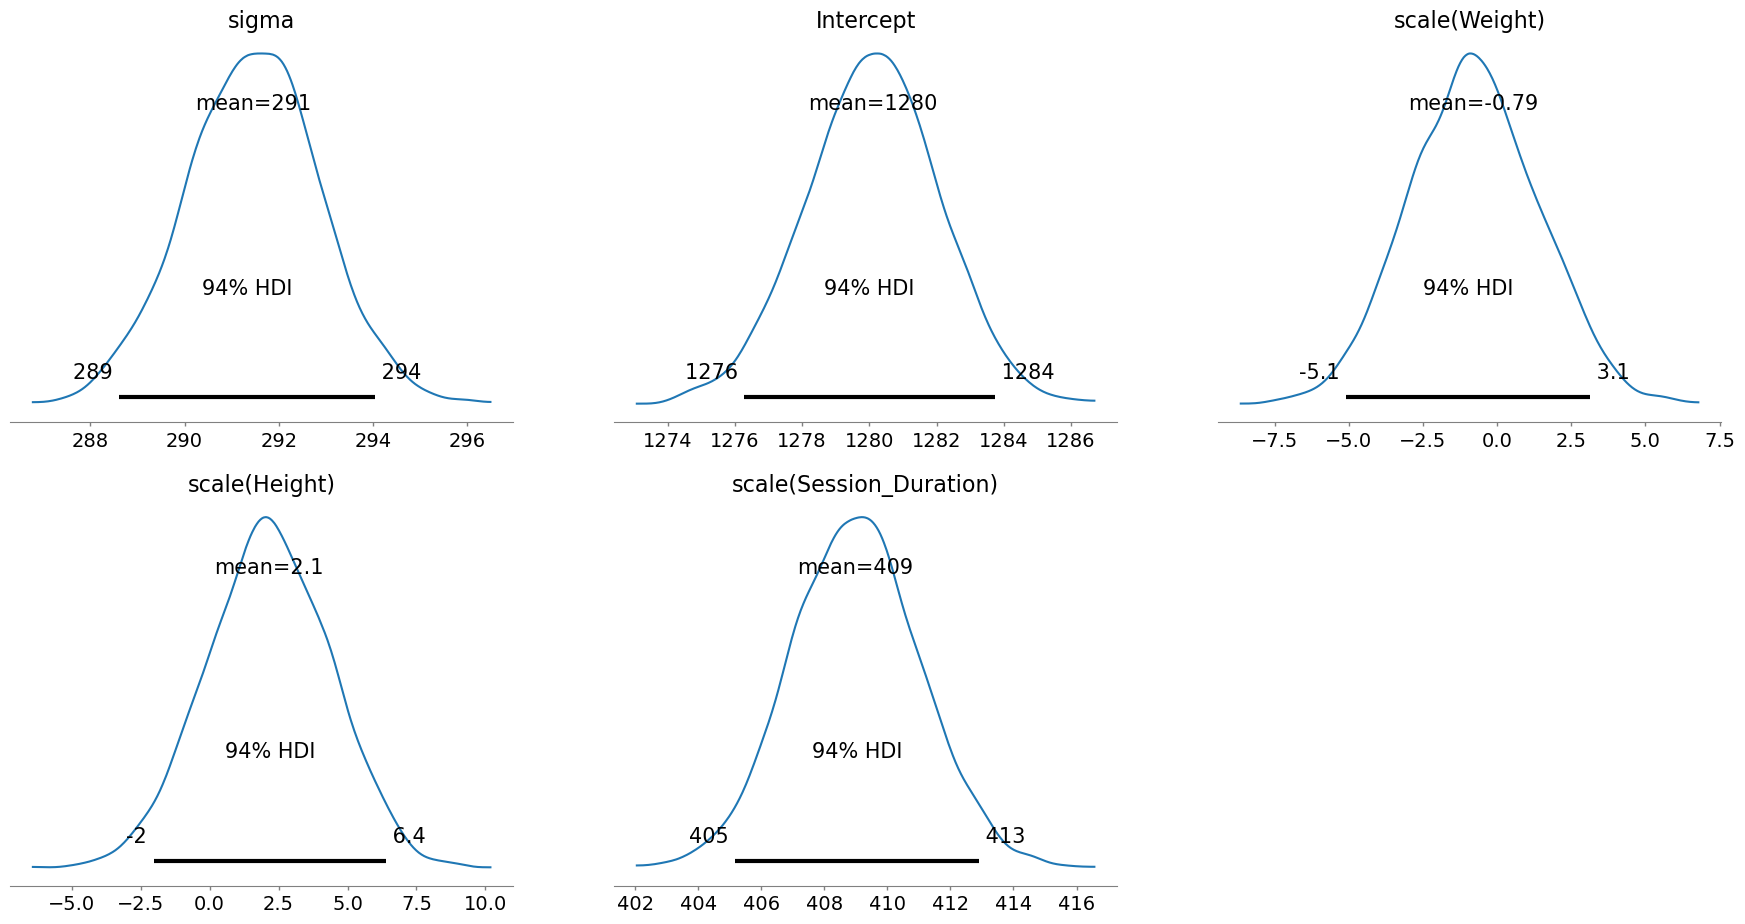

In [58]:
az.plot_posterior(idata_rl);

Default computed for conditional variable: Height
Default computed for unspecified variable: Session_Duration, Weight
Default computed for conditional variable: Weight
Default computed for unspecified variable: Height, Session_Duration
Default computed for conditional variable: Session_Duration
Default computed for unspecified variable: Height, Weight


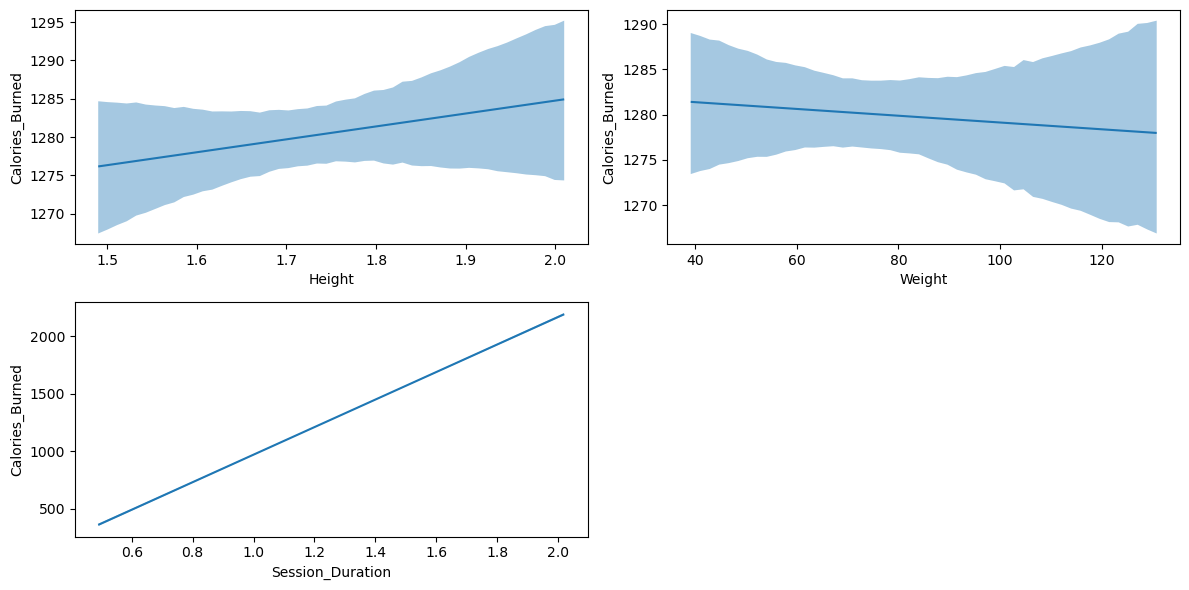

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

fig.delaxes(axes[1, 1])

bmb.interpret.plot_predictions(rl, idata_rl, conditional=['Height'], ax=axes[0, 0])
bmb.interpret.plot_predictions(rl, idata_rl, conditional=['Weight'], ax=axes[0, 1])
bmb.interpret.plot_predictions(rl, idata_rl, conditional=['Session_Duration'], ax=axes[1, 0])
plt.tight_layout();


### 5.
Realizar predicciones a posteriori e interpretarlas en el contexto del problema.


In [65]:
rl.predict(idata_rl, kind='response', data=ls)

Default computed for conditional variable: Height
Default computed for unspecified variable: Session_Duration, Weight
Default computed for conditional variable: Weight
Default computed for unspecified variable: Height, Session_Duration
Default computed for conditional variable: Session_Duration
Default computed for unspecified variable: Height, Weight


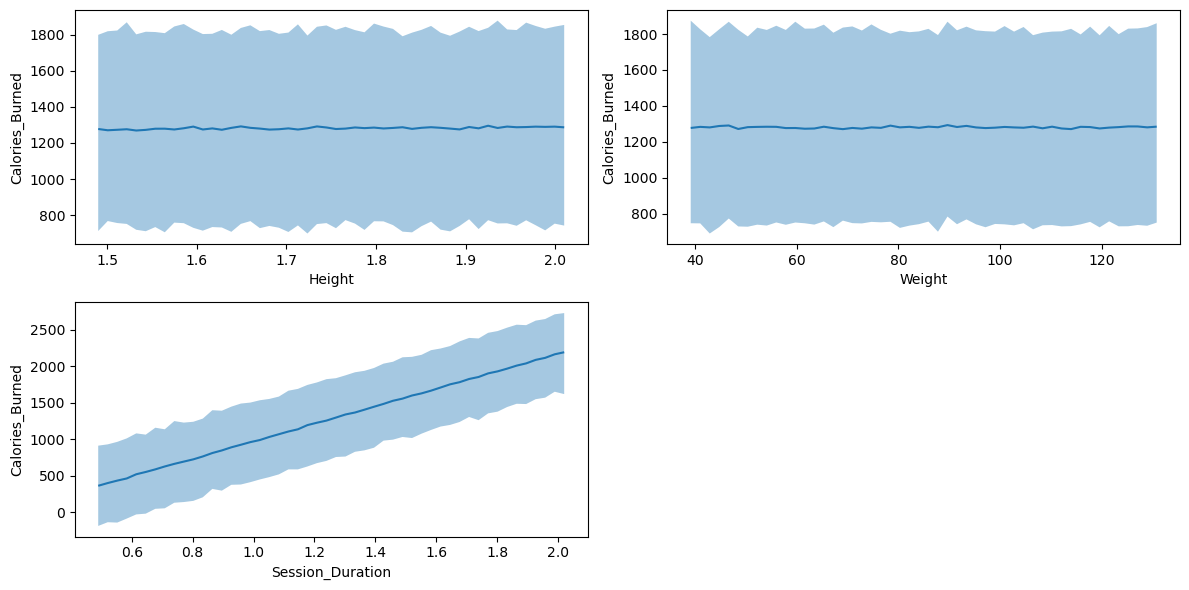

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

fig.delaxes(axes[1, 1])

bmb.interpret.plot_predictions(rl, idata_rl, conditional=['Height'], pps=True, ax=axes[0, 0])
bmb.interpret.plot_predictions(rl, idata_rl, conditional=['Weight'], pps=True, ax=axes[0, 1])
bmb.interpret.plot_predictions(rl, idata_rl, conditional=['Session_Duration'], pps=True, ax=axes[1, 0])
plt.tight_layout();

### 6.
Si el modelo lo permite, incluir predictores categoricos, interacciones o estructura jerarquica.

In [67]:
rl_int = bmb.Model('Calories_Burned ~ scale(Weight) + scale(Height) + scale(Session_Duration) + scale(Weight):scale(Height)', data=ls)

In [ ]:
idata_rl_int = rl_int.fit(random_seed=SEED)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, scale(Weight), scale(Height), scale(Session_Duration), scale(Weight):scale(Height)]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 106 seconds.


Default computed for conditional variable: Height, Weight
Default computed for unspecified variable: Session_Duration


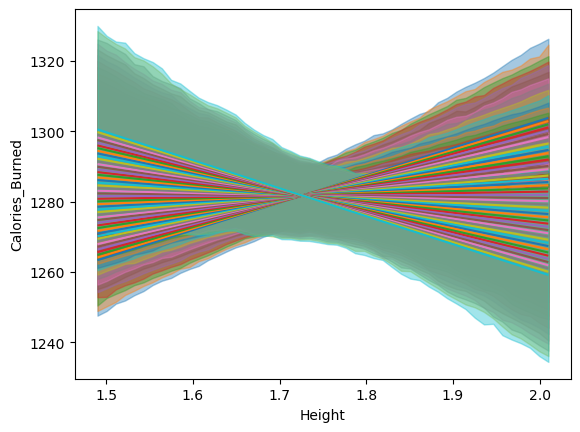

In [78]:
bmb.interpret.plot_predictions(rl_int, idata_rl_int, conditional=['Height', 'Weight'])
plt.legend([],[], frameon=False);

Default computed for conditional variable: Height
Default computed for unspecified variable: Session_Duration, Weight
Default computed for conditional variable: Weight
Default computed for unspecified variable: Height, Session_Duration
Default computed for conditional variable: Session_Duration
Default computed for unspecified variable: Height, Weight


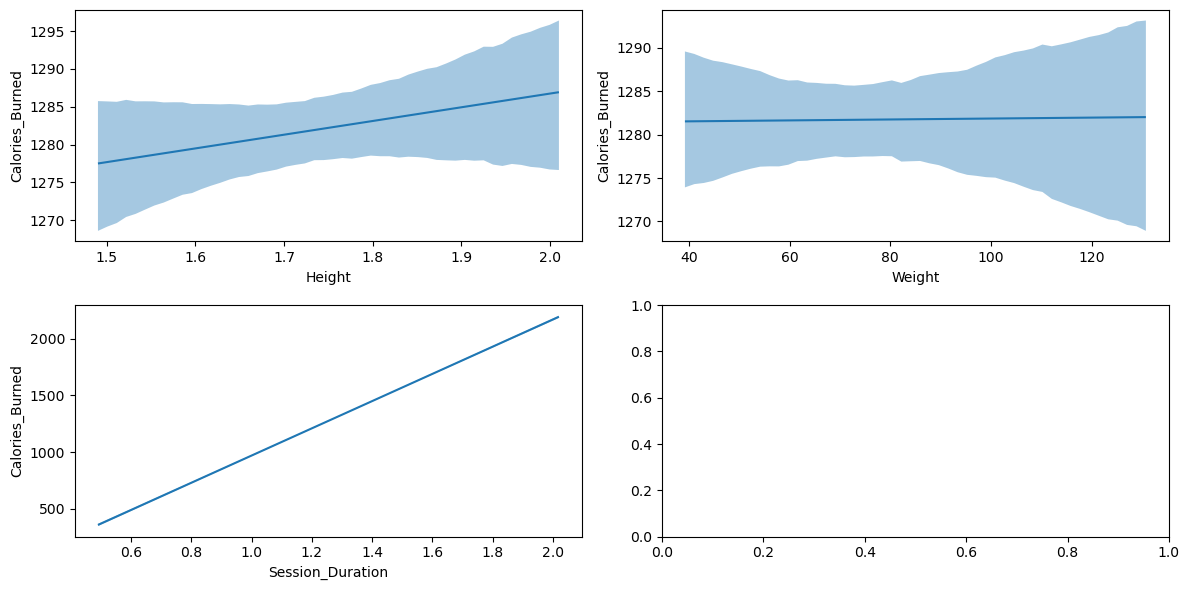

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

bmb.interpret.plot_predictions(rl_int, idata_rl_int, conditional=['Height'], ax=axes[0, 0])
bmb.interpret.plot_predictions(rl_int, idata_rl_int, conditional=['Weight'], ax=axes[0, 1])
bmb.interpret.plot_predictions(rl_int, idata_rl_int, conditional=['Session_Duration'], ax=axes[1, 0])
plt.tight_layout();